CICERO ROGÉRIO LIMA TENÓRIO FILHO


Questão 1 - Construa, “manualmente”, 3 versões de bases de conhecimento com regras do tipo
SE...ENTÃO... a partir da base de dados seguinte, supostamente fornecida pelo “gerente
do banco”, mas que você deve ampliá-la para conter 20 exemplos (E15, E16, …, E20), com
a adição de 6 exemplos: 3 para Risco = Baixo e 3 outros para Risco = Moderado. Para isso,
use os 3 algoritmos ID3, C4.5 e CART. Apresente a descrição processo de construção com
as etapas de construção da árvore, nos casos do ID3, C4.5 e CART. Discuta os resultados,
fazendo comparações.

- **EX:** Conjunto de Exemplos de Avaliação de Risco de Crédito:
- 4 tributos e 3 classes (Bseado no livro do Luger: IA)

| ID  | História de Crédito | Dívida | Garantia  | Renda        | Risco     |
|-----|---------------------|--------|-----------|--------------|-----------|
| E1  | Ruim                | Alta   | Nenhuma   | 0 a 15k      | Alto      |
| E2  | Desconhecida        | Alta   | Nenhuma   | 15 a 35k     | Alto      |
| E3  | Desconhecida        | Baixa  | Nenhuma   | 15 a 35k     | Moderado  |
| E4  | Desconhecida        | Baixa  | Nenhuma   | 0 a 15k      | Alto      |
| E5  | Desconhecida        | Baixa  | Nenhuma   | Acima de 35k | Baixo     |
| E6  | Desconhecida        | Baixa  | Adequada  | Acima de 35k | Baixo     |
| E7  | Ruim                | Baixa  | Nenhuma   | 0 a 15k      | Alto      |
| E8  | Ruim                | Baixa  | Adequada  | Acima de 35k | Moderado  |
| E9  | Boa                 | Baixa  | Nenhuma   | Acima de 35k | Baixo     |
| E10 | Boa                 | Alta   | Adequada  | Acima de 35k | Baixo     |
| E11 | Boa                 | Alta   | Nenhuma   | 0 a 15k      | Alto      |
| E12 | Boa                 | Alta   | Nenhuma   | 15 a 35k     | Moderado  |
| E13 | Boa                 | Alta   | Nenhuma   | Acima de 35k | Baixo     |
| E14 | Ruim                | Alta   | Nenhuma   | 15 a 35k     | Alto      |




RESPOSTA:

- RESOULUÇÃO FEITA NO OVERLEAF

Questão 2 - Tal como feito em 1), construa e apresente as árvores de decisões geradas e suas bases de
regras correspondentes, obtidas a partir do uso dos algoritmos ID3, C4.5 e CART, só que
agora usando as implementações deles disponíveis em alguma biblioteca de “Machine
Learning” (ex.: Scikit Learn ou R ou Weka, …) ou se preferir, implemente os algoritmos e
mostre o processo de construção e o resultado.

RESPOSTA:
- REGRAS DERIVADAS DO MODELO NO DOCUMENTO NO OVERLEAF

In [ ]:
!pip install id3
from IPython.display import Image
from io import StringIO
import pydotplus
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import six
import sys
sys.modules['sklearn.externals.six'] = six
from id3 import Id3Estimator, export_graphviz

# Carregando o conjunto de dados
data = pd.read_csv('data_risk.csv')

# Removendo a coluna 'index'
data = data.drop('index', axis=1)

# Separando os atributos e a classe
X = data.drop('Risco', axis=1)
y = data['Risco']

# Codificando as colunas categóricas
le = LabelEncoder()
for col in X.columns:
    X[col] = le.fit_transform(X[col])

# Criando o estimador
estimator = Id3Estimator()

# Treinando o modelo
estimator.fit(X, y)

# Exportando a árvore de decisão para um arquivo .dot
export_graphviz(estimator.tree_, 'tree.dot', X.columns)

from graphviz import Source

with open('tree.dot', 'r') as f:
    dot_graph = f.read()

Source(dot_graph)

Questão 3 - Considerando a arquitetura conceitual de um agente baseado em conhecimento, mostrada
detalhadamente nas aulas e exibida abaixo, considerando ainda uma base de conhecimento
expressa por sentenças de uma linguagem da lógica proposicional, elabore e implemente
um engenho de inferência constituído por um controlador, uma coleção de 5 regras de
inferência e um mecanismo de busca (em profundidade ou em largura).

**As regras de inferência são:**

MP: Modus Ponens: P → Q , P produz Q // Se P=Sim então Q=Sim, P=Sim, Q=sim MT:
Modus Tollens: P → Q , ~Q produz ~P
SH: Silogismo Hipotético: P → Q , Q → R produz P → R
SD: Silogismo Disjuntivo: P v Q , ~P produz Q
Introdução do &: P, Q produz P & Q

Segue um exemplo de problema que seria resolvido com o engenho de
inferência.

**Ex:** Sentenças condicionais ( Equivalente a uma Base de Regras):
- S1 : A ^ B → C // Se A = Sim AND B = Sim Então C = Sim
- S2 : A → D
- S3 : C ^ D → E
- S4 : B ^ E ^ F → G
- S5 : A ^ E → H
- S6 : D ^ E ^ H → I

Sentenças atômicas (Equivalente a uma Base de Fatos):
- S7: A // A = Sim
- S8 : B
- S9 : F


Objetivo: Provar H = Sim

**Obs:** Mais detalhes e dicas importantes vão ser dadas, por mim, em sala de aula.

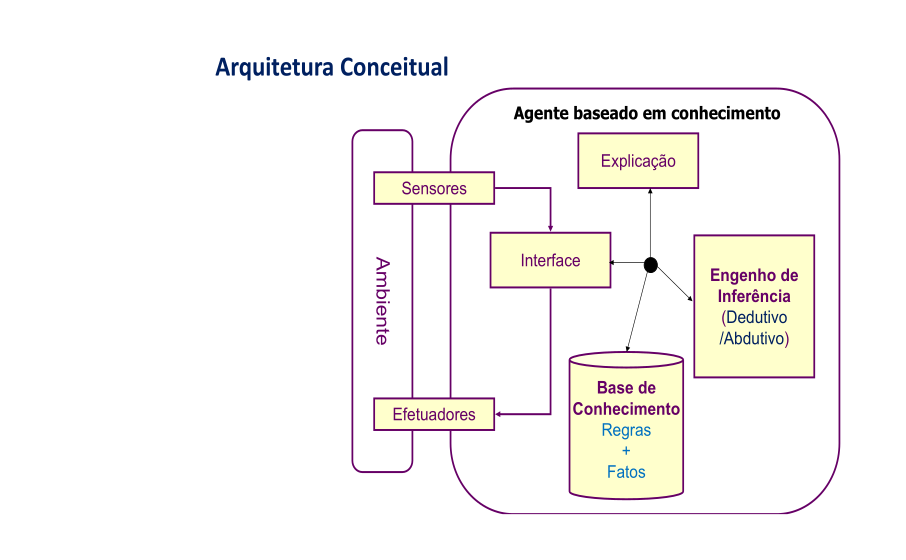

In [ ]:
from collections import deque

def modus_ponens(p, q, facts):
    return q if p in facts else None

def modus_tollens(p, q, facts):
    return None if q in facts else p

def silogismo_hipotetico(p, q, r, facts):
    return (p, r) if q in facts else None

def silogismo_disjuntivo(p, q, facts):
    return q if p not in facts else None

def introducao_and(p, q, facts):
    return (p, q) if p in facts and q in facts else None

# Base de Regras
rules = [
    (('A', 'B'), 'C'),
    ('A', 'D'),
    (('C', 'D'), 'E'),
    (('B', 'E', 'F'), 'G'),
    (('A', 'E'), 'H'),
    (('D', 'E', 'H'), 'I')
]

# Base de Fatos
facts = {'A', 'B', 'F'}

def infer(goal):
    stack = deque([goal])
    inferred = set()

    while stack:
        current = stack.pop()
        if current in facts:
            continue

        for rule in rules:
            premises, conclusion = rule if isinstance(rule[0], tuple) else ((rule[0],), rule[1])

            if conclusion == current and all(p in facts for p in premises):
                facts.add(current)
                inferred.add(current)
                break
            elif conclusion == current:
                stack.extend(premises)

    return goal in facts

# Testando se H pode ser provado
resultado = infer('H')
print(f"H pode ser provado? {'Sim' if resultado else 'Não'}")


H pode ser provado? Não


Questão 4 - Com base na arquitetura conceitual de um agente baseado em conhecimento, mostrada nas
aulas e exibida a seguir, implemente uma ferramenta (genérica) para construir aplicações
de sistema baseado em agente baseado em conhecimento, tendo uma base de conhecimento
representada por uma coleção de regras do tipo SE…ENTÃO …, e por fatos, nos moldes
vistos em sala de aula. Especificamente, esta ferramenta deverá incluir os módulos de um
editor de base de conhecimento, de um motor de inferência com encadeamento para trás (e
mais o encadeamento para frente e o misto), explanação (Por quê? Como?) e interface,
desejavelmente, com diálogo em linguagem natural.

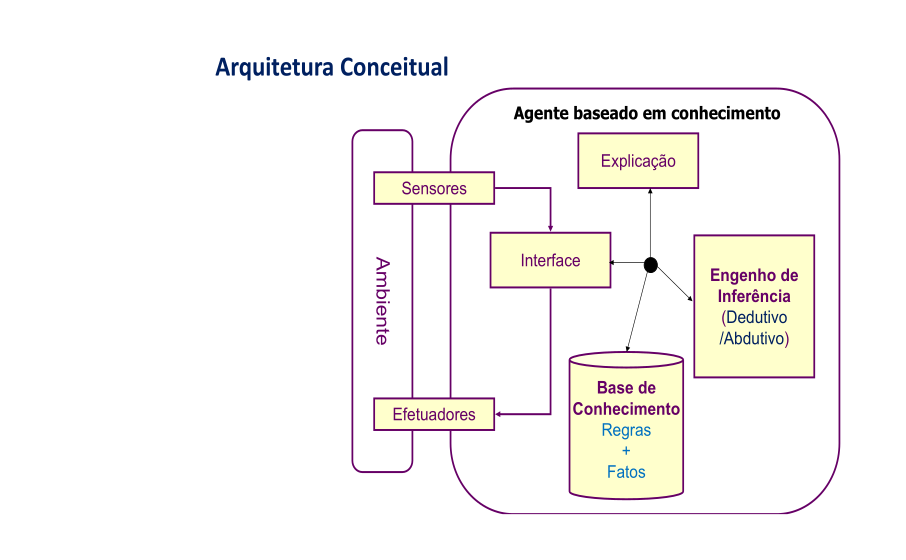

In [ ]:
from collections import deque

class KnowledgeBase:
    def __init__(self):
        self.rules = []
        self.facts = set()

    def add_rule(self, premises, conclusion):
        self.rules.append((premises, conclusion))

    def add_fact(self, fact):
        self.facts.add(fact)

    def modus_ponens(self, p, q):
        return q if p in self.facts else None

    def modus_tollens(self, p, q):
        return None if q in self.facts else p

    def silogismo_hipotetico(self, p, q, r):
        return (p, r) if q in self.facts else None

    def silogismo_disjuntivo(self, p, q):
        return q if p not in self.facts else None

    def introducao_and(self, p, q):
        return (p, q) if p in self.facts and q in self.facts else None

    def infer(self, goal, method='backward'):
        if method == 'backward':
            return self.backward_chaining(goal)
        elif method == 'forward':
            return self.forward_chaining(goal)
        return False

    def backward_chaining(self, goal):
        stack = deque([goal])
        inferred = set()

        while stack:
            current = stack.pop()
            if current in self.facts:
                continue

            for rule in self.rules:
                premises, conclusion = rule if isinstance(rule[0], tuple) else ((rule[0],), rule[1])

                if conclusion == current and all(p in self.facts for p in premises):
                    self.facts.add(current)
                    inferred.add(current)
                    break
                elif conclusion == current:
                    stack.extend(premises)

        return goal in self.facts

    def forward_chaining(self, goal):
        new_facts = set(self.facts)
        changes = True

        while changes:
            changes = False
            for premises, conclusion in self.rules:
                if isinstance(premises, tuple):
                    if all(p in new_facts for p in premises) and conclusion not in new_facts:
                        new_facts.add(conclusion)
                        changes = True
                else:
                    if premises in new_facts and conclusion not in new_facts:
                        new_facts.add(conclusion)
                        changes = True

        return goal in new_facts

# Criando a base de conhecimento
kb = KnowledgeBase()

# Adicionando regras
kb.add_rule(('A', 'B'), 'C')
kb.add_rule('A', 'D')
kb.add_rule(('C', 'D'), 'E')
kb.add_rule(('B', 'E', 'F'), 'G')
kb.add_rule(('A', 'E'), 'H')
kb.add_rule(('D', 'E', 'H'), 'I')

# Adicionando fatos
kb.add_fact('A')
kb.add_fact('B')
kb.add_fact('F')

# Testando se H pode ser provado por encadeamento para trás e para frente
resultado_backward = kb.infer('H', method='backward')
resultado_forward = kb.infer('H', method='forward')

print(f"H pode ser provado por encadeamento para trás? {'Sim' if resultado_backward else 'Não'}")
print(f"H pode ser provado por encadeamento para frente? {'Sim' if resultado_forward else 'Não'}")


H pode ser provado por encadeamento para trás? Não
H pode ser provado por encadeamento para frente? Sim


Questão 5 - Com a ferramenta construída em 4), desenvolva três aplicações (a serem melhor detalhadas
em sala de aula): (i) uma voltada para o problema do gerente, nos termos enunciado em
sala de aula e considerando a base de conhecimento gerada no exercício 1), (ii) outra voltada
para diagnóstico medico nos moldes do Mycin e (iii) uma outra para implementar um
“mini”-akinator. Ressalto que você pode sugerir trocar uma dessas 3 por uma outra de sua
preferência, mas aprovada pelo professor Evandro.

In [ ]:
from collections import deque

class KnowledgeBase:
    def __init__(self):
        self.rules = []
        self.facts = set()

    def add_rule(self, premises, conclusion):
        self.rules.append((premises, conclusion))

    def add_fact(self, fact):
        self.facts.add(fact)

    def infer(self, goal, method='backward'):
        if method == 'backward':
            return self.backward_chaining(goal)
        elif method == 'forward':
            return self.forward_chaining(goal)
        return False

    def backward_chaining(self, goal):
        stack = deque([goal])
        inferred = set()

        while stack:
            current = stack.pop()
            if current in self.facts:
                continue

            for rule in self.rules:
                premises, conclusion = rule if isinstance(rule[0], tuple) else ((rule[0],), rule[1])

                if conclusion == current and all(p in self.facts for p in premises):
                    self.facts.add(current)
                    inferred.add(current)
                    break
                elif conclusion == current:
                    stack.extend(premises)

        return goal in self.facts

    def forward_chaining(self, goal):
        new_facts = set(self.facts)
        changes = True

        while changes:
            changes = False
            for premises, conclusion in self.rules:
                if isinstance(premises, tuple):
                    if all(p in new_facts for p in premises) and conclusion not in new_facts:
                        new_facts.add(conclusion)
                        changes = True
                else:
                    if premises in new_facts and conclusion not in new_facts:
                        new_facts.add(conclusion)
                        changes = True

        return goal in new_facts

    def explain_why(self, goal):
        if goal in self.facts:
            return f"{goal} é um fato conhecido."

        explanations = []
        for premises, conclusion in self.rules:
            if conclusion == goal:
                premise_text = " e ".join(premises) if isinstance(premises, tuple) else premises
                explanations.append(f"Se {premise_text}, então {goal}.")

        return explanations if explanations else f"Não há regras que levam a {goal}."

    def explain_how(self, goal):
        if goal in self.facts:
            return f"{goal} é um fato conhecido."

        proof_path = []
        def trace(goal):
            for premises, conclusion in self.rules:
                if conclusion == goal:
                    proof_path.append((premises, conclusion))
                    if isinstance(premises, tuple):
                        for p in premises:
                            trace(p)
                    else:
                        trace(premises)

        trace(goal)

        return proof_path if proof_path else f"Não foi possível inferir {goal}."

# Criando a base de conhecimento
kb = KnowledgeBase()

# Adicionando regras
kb.add_rule(('A', 'B'), 'C')
kb.add_rule('A', 'D')
kb.add_rule(('C', 'D'), 'E')
kb.add_rule(('B', 'E', 'F'), 'G')
kb.add_rule(('A', 'E'), 'H')
kb.add_rule(('D', 'E', 'H'), 'I')

# Adicionando fatos
kb.add_fact('A')
kb.add_fact('B')
kb.add_fact('F')

# Testando inferência
resultado_backward = kb.infer('H', method='backward')
resultado_forward = kb.infer('H', method='forward')
explicacao_why = kb.explain_why('H')
explicacao_how = kb.explain_how('H')

print(f"H pode ser provado por encadeamento para trás? {'Sim' if resultado_backward else 'Não'}")
print(f"H pode ser provado por encadeamento para frente? {'Sim' if resultado_forward else 'Não'}")
print(f"Por que H? {explicacao_why}")
print(f"Como H foi inferido? {explicacao_how}")


H pode ser provado por encadeamento para trás? Não
H pode ser provado por encadeamento para frente? Sim
Por que H? ['Se A e E, então H.']
Como H foi inferido? [(('A', 'E'), 'H'), (('C', 'D'), 'E'), (('A', 'B'), 'C'), ('A', 'D')]
